In [1]:

import urllib
import json
import pandas as pd

In [2]:
import os
import numpy as np
from bs4 import BeautifulSoup
import requests
import geopandas as gpd

In [3]:
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [4]:
#look at csv files doenloaded from: https://data.ontario.ca/dataset/status-of-covid-19-cases-in-ontario

In [174]:
u = 'https://data.ontario.ca/dataset/status-of-covid-19-cases-in-ontario'

In [175]:
cases_page = requests.get(u)

In [176]:
cases_soup = BeautifulSoup(cases_page.text, 'html.parser')

In [177]:
cases_tags = cases_soup.find_all('a')
cases_csv = []
for a in cases_tags:
    href = (a['href'])
    end = href[-3:]
    if (end == 'csv'):
        cases_csv.append(href)

In [178]:
cases_csv

['https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11/download/covidtesting.csv']

In [179]:
cases = pd.read_csv (cases_csv[0])

In [180]:
cases.index = pd.to_datetime(cases['Reported Date'])

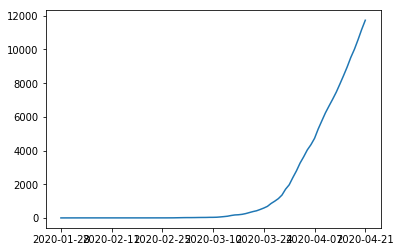

In [181]:
plt.plot(cases['Total Cases'])

In [182]:
cases.columns

Index(['Reported Date', 'Confirmed Negative', 'Presumptive Negative',
       'Presumptive Positive', 'Confirmed Positive', 'Resolved', 'Deaths',
       'Total Cases',
       'Total patients approved for testing as of Reporting Date',
       'Total tests completed in the last day', 'Under Investigation',
       'Number of patients hospitalized with COVID-19',
       'Number of patients in ICU with COVID-19',
       'Number of patients in ICU on a ventilator with COVID-19'],
      dtype='object')

In [183]:
#time series

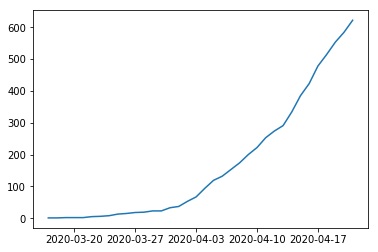

In [184]:
plt.plot(cases['Deaths'])

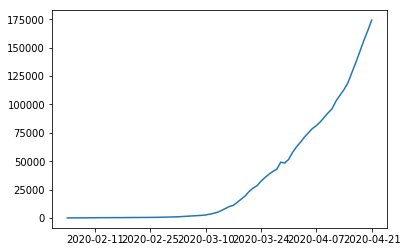

In [185]:
plt.plot(cases['Total patients approved for testing as of Reporting Date'])

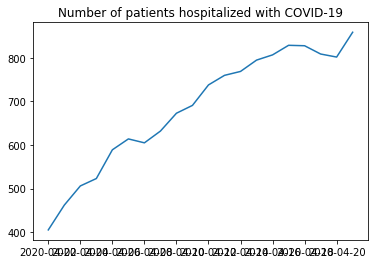

In [186]:
plt.plot(cases['Number of patients hospitalized with COVID-19'])
plt.title("Number of patients hospitalized with COVID-19")
plt.show()

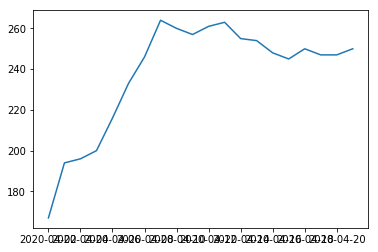

In [187]:
plt.plot(cases['Number of patients in ICU with COVID-19'])

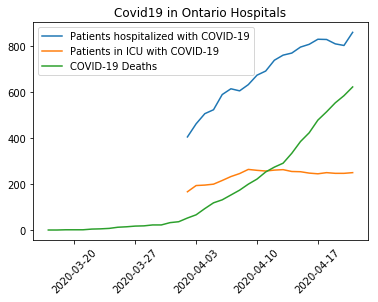

In [188]:
fig, ax = plt.subplots(1, 1)
plt.plot(cases['Number of patients hospitalized with COVID-19'])
plt.plot(cases['Number of patients in ICU with COVID-19'])
plt.plot(cases['Deaths'])
plt.title('Covid19 in Ontario Hospitals')
plt.legend(('Patients hospitalized with COVID-19','Patients in ICU with COVID-19', 'COVID-19 Deaths' ))
plt.xticks(rotation=45)
plt.show()

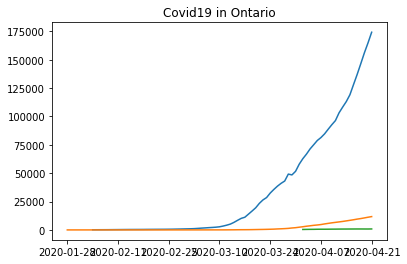

In [189]:
fig, ax = plt.subplots(1, 1)
plt.plot(cases['Total patients approved for testing as of Reporting Date'])
plt.plot(cases['Total Cases'])
plt.plot(cases['Number of patients hospitalized with COVID-19'])
plt.title('Covid19 in Ontario')
plt.show()

In [21]:
#would be good to know how many are in hospitals 

In [22]:
#get the csv file from https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario

In [110]:
url = 'https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario'

In [111]:
page = requests.get(url)

In [112]:
soup = BeautifulSoup(page.text, 'html.parser')

In [113]:
 tags = soup.find_all('a')

In [114]:
len(tags)

40

In [115]:
#get the csv link

In [116]:
csvurl = []
for a in tags:
    href = (a['href'])
    end = href[-3:]
    if (end == 'csv'):
        csvurl.append(href)
        

In [117]:
csvurl

['https://data.ontario.ca/dataset/f4112442-bdc8-45d2-be3c-12efae72fb27/resource/455fd63b-603d-4608-8216-7d8647f43350/download/conposcovidloc.csv']

In [118]:
data = pd.read_csv (csvurl[0])

In [119]:
len(data)

11735

In [120]:
data.columns

Index(['Row_ID', 'Accurate_Episode_Date', 'Age_Group', 'Client_Gender',
       'Case_AcquisitionInfo', 'Outcome1', 'Reporting_PHU',
       'Reporting_PHU_City', 'Reporting_PHU_Postal_Code',
       'Reporting_PHU_Website', 'Reporting_PHU_Latitude',
       'Reporting_PHU_Longitude'],
      dtype='object')

In [122]:
data['Outcome1'].unique()

array(['Resolved', 'Not Resolved', 'Fatal'], dtype=object)

In [123]:
data['Reporting_PHU_City'].value_counts()

Toronto             3372
Mississauga         1738
Newmarket           1105
Ottawa               869
Whitby               669
Windsor              484
Oakville             385
Thorold              381
London               341
Hamilton             334
Brockville           276
Waterloo             264
Barrie               202
Guelph               197
Simcoe               162
Point Edward         146
Port Hope            135
Brantford             81
Cornwall              70
Owen Sound            61
Peterborough          58
Kingston              56
Timmins               49
Thunder Bay           48
Sudbury               44
St. Thomas            42
Stratford             36
Belleville            34
Chatham               31
Pembroke              14
North Bay             14
Kenora                13
New Liskeard          12
Sault Ste. Marie      12
Name: Reporting_PHU_City, dtype: int64

travel data is now absent from the data set!

In [34]:
data.describe()

,ROW_ID,Reporting_PHU_Latitude,Reporting_PHU_Longitude
count,11184.00000,11184.000000,11184.000000
mean,5592.50000,43.813612,-79.414988
std,3228.68704,0.830668,1.767290
min,1.00000,42.308796,-94.488254
25%,2796.75000,43.647471,-79.708893
50%,5592.50000,43.656591,-79.379358
75%,8388.25000,44.048023,-79.379358
max,11184.00000,49.769615,-74.736298


In [124]:
data['ID'] = np.arange(len(data))

In [125]:
locations = pd.pivot_table(data, values='ID', index=['Reporting_PHU_City','Reporting_PHU_Latitude', 'Reporting_PHU_Longitude'],
                    columns=[], aggfunc='count')

In [126]:
locations = pd.DataFrame(locations.to_records())

In [127]:
locations.columns

Index(['Reporting_PHU_City', 'Reporting_PHU_Latitude',
       'Reporting_PHU_Longitude', 'ID'],
      dtype='object')

In [128]:
locations.head()

,Reporting_PHU_City,Reporting_PHU_Latitude,Reporting_PHU_Longitude,ID
0,Barrie,44.410713,-79.686306,202
1,Belleville,44.186674,-77.391446,34
2,Brantford,43.151811,-80.274374,81
3,Brockville,44.615843,-75.702833,276
4,Chatham,42.403861,-82.208561,31


In [129]:
locations = locations.sort_values(by=['ID'], ascending = 0)

In [130]:
locations

,Reporting_PHU_City,Reporting_PHU_Latitude,Reporting_PHU_Longitude,ID
30,Toronto,43.656591,-79.379358,3372
11,Mississauga,43.647471,-79.708893,1738
13,Newmarket,44.048023,-79.480239,1105
16,Ottawa,45.345665,-75.763912,869
32,Whitby,43.898605,-78.940341,669
33,Windsor,42.308796,-83.033670,484
15,Oakville,43.413997,-79.744796,385
27,Thorold,43.116537,-79.241220,381
10,London,42.981468,-81.254016,341
7,Hamilton,43.257631,-79.871341,334


In [131]:
ont_census = gpd.read_file('ontario/ontario_cen.shp')

In [132]:
ont_census.columns

Index(['CDUID', 'CDNAME', 'CDTYPE', 'PRUID', 'PRNAME', 'geometry'], dtype='object')

In [133]:
locations.columns

Index(['Reporting_PHU_City', 'Reporting_PHU_Latitude',
       'Reporting_PHU_Longitude', 'ID'],
      dtype='object')

In [134]:
geometry = [Point(xy) for xy in zip(locations['Reporting_PHU_Longitude'], locations['Reporting_PHU_Latitude'])]

In [135]:
locationsgdf = gpd.GeoDataFrame(
    locations, geometry=geometry)

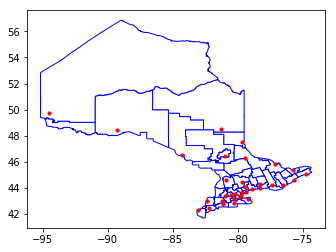

In [136]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ont_census.plot(ax =ax, color='white', edgecolor='blue')
locationsgdf.plot(ax=ax, marker='o', color='red', markersize=10)
plt.show()


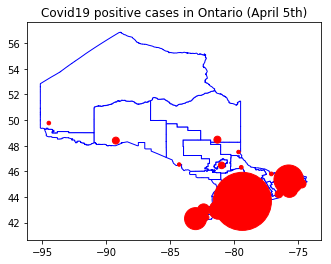

In [137]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ont_census.plot(ax =ax, color='white', edgecolor='blue')
locationsgdf.plot(ax=ax, marker='o', color='red', markersize=locationsgdf['ID'])
plt.title('Covid19 positive cases in Ontario (April 5th)')
plt.show()

In [138]:
np.intersect1d(ont_census['CDNAME'], locationsgdf['Reporting_PHU_City'])

array(['Hamilton', 'Kenora', 'Ottawa', 'Peterborough', 'Simcoe',
       'Sudbury', 'Thunder Bay', 'Toronto', 'Waterloo'], dtype=object)

In [139]:
#names are not the same so we will use use spatial intersection of points and polygons

In [140]:
locationsgdf.crs = ont_census.crs

In [141]:
locationsgdf.crs

{'init': 'epsg:4326'}

In [142]:
ont_census.crs

{'init': 'epsg:4326'}

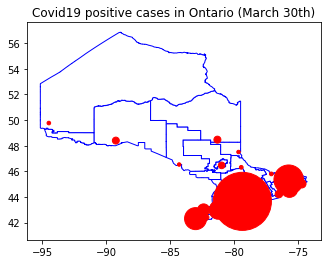

In [143]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ont_census.plot(ax =ax, color='white', edgecolor='blue')
locationsgdf.plot(ax=ax, marker='o', color='red', markersize=locationsgdf['ID'])
plt.title('Covid19 positive cases in Ontario (March 30th)')
plt.show()

In [144]:
##perhaps the simplset way is to use the coordinates to combine the points dataset with the polygons?

In [145]:
join = gpd.sjoin(ont_census, locationsgdf, how="left", op='contains')

In [146]:
join.head()

,CDUID,CDNAME,CDTYPE,PRUID,PRNAME,geometry,index_right,Reporting_PHU_City,Reporting_PHU_Latitude,Reporting_PHU_Longitude,ID
0,3501,"Stormont, Dundas and Glengarry",UC,35,Ontario,"POLYGON ((-74.4713040936025 45.40187383511515,...",5.0,Cornwall,45.029152,-74.736298,70.0
1,3502,Prescott and Russell,UC,35,Ontario,POLYGON ((-74.62538544467891 45.63443374220564...,NaN,NaN,NaN,NaN,NaN
2,3506,Ottawa,CDR,35,Ontario,POLYGON ((-75.32507910431494 45.50887568795096...,16.0,Ottawa,45.345665,-75.763912,869.0
3,3507,Leeds and Grenville,UC,35,Ontario,POLYGON ((-75.61306408789596 45.10544909988855...,3.0,Brockville,44.615843,-75.702833,276.0
4,3509,Lanark,CTY,35,Ontario,POLYGON ((-76.21583368165032 45.30192850522137...,NaN,NaN,NaN,NaN,NaN


In [147]:
join['ID'] = join['ID'].fillna(0)

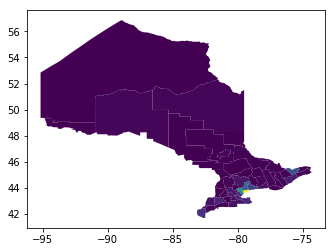

In [148]:
join.plot(column='ID')

In [149]:
join['CDTYPE'].unique()

array(['UC', 'CDR', 'CTY', 'RM', 'DM', 'DIS'], dtype=object)

In [150]:
south = join[join['CDTYPE']!='DIS']

In [151]:
south

,CDUID,CDNAME,CDTYPE,PRUID,PRNAME,geometry,index_right,Reporting_PHU_City,Reporting_PHU_Latitude,Reporting_PHU_Longitude,ID
0,3501,"Stormont, Dundas and Glengarry",UC,35,Ontario,"POLYGON ((-74.4713040936025 45.40187383511515,...",5.0,Cornwall,45.029152,-74.736298,70.0
1,3502,Prescott and Russell,UC,35,Ontario,POLYGON ((-74.62538544467891 45.63443374220564...,NaN,NaN,NaN,NaN,0.0
2,3506,Ottawa,CDR,35,Ontario,POLYGON ((-75.32507910431494 45.50887568795096...,16.0,Ottawa,45.345665,-75.763912,869.0
3,3507,Leeds and Grenville,UC,35,Ontario,POLYGON ((-75.61306408789596 45.10544909988855...,3.0,Brockville,44.615843,-75.702833,276.0
4,3509,Lanark,CTY,35,Ontario,POLYGON ((-76.21583368165032 45.30192850522137...,NaN,NaN,NaN,NaN,0.0
5,3510,Frontenac,CTY,35,Ontario,POLYGON ((-76.79163282633967 45.18223921626453...,9.0,Kingston,44.227874,-76.525211,56.0
6,3511,Lennox and Addington,CTY,35,Ontario,POLYGON ((-77.07057596680502 44.97145689472787...,NaN,NaN,NaN,NaN,0.0
7,3512,Hastings,CTY,35,Ontario,POLYGON ((-77.69016510856596 45.43667604925592...,1.0,Belleville,44.186674,-77.391446,34.0
8,3513,Prince Edward,CDR,35,Ontario,POLYGON ((-77.07077588514657 44.11047219578854...,NaN,NaN,NaN,NaN,0.0
9,3514,Northumberland,CTY,35,Ontario,POLYGON ((-77.64877984031853 44.26612038424479...,21.0,Port Hope,43.968173,-78.285792,135.0


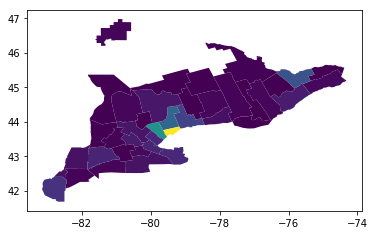

In [152]:
south.plot(column='ID')

Text(0.5,1,'Covid19 cases in Southern Ontario')

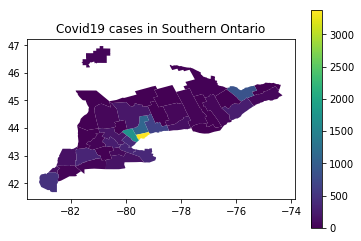

In [153]:
fig, ax = plt.subplots(1, 1)
south.plot(column='ID', ax=ax, legend=True)
plt.title('Covid19 cases in Southern Ontario')

In [154]:
from collections import OrderedDict

In [155]:
cmaps = OrderedDict()

Text(0.5,1,'Covid19 cases in Southern Ontario')

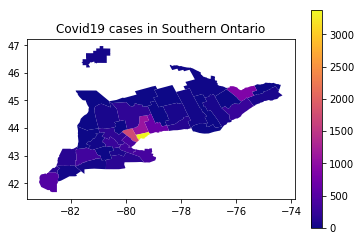

In [156]:
fig, ax = plt.subplots(1, 1)
south.plot(column='ID', ax=ax, legend=True, cmap='plasma')
plt.title('Covid19 cases in Southern Ontario')

In [157]:
south.columns

Index(['CDUID', 'CDNAME', 'CDTYPE', 'PRUID', 'PRNAME', 'geometry',
       'index_right', 'Reporting_PHU_City', 'Reporting_PHU_Latitude',
       'Reporting_PHU_Longitude', 'ID'],
      dtype='object')

In [158]:
#ontario popolation from https://www12.statcan.gc.ca/

In [159]:
os.listdir('ontario')

['cases_dashboard-march26.ipynb',
 'moh-covid-19-report-en-2020-03-29.pdf',
 'ontario_cen.dbf',
 'ontario_cen.prj',
 'ontario_cen.shp',
 'ontario_cen.shx',
 'ontario_cen_sub.dbf',
 'ontario_cen_sub.prj',
 'ontario_cen_sub.shp',
 'ontario_cen_sub.shx',
 'ont_pop.CSV',
 'shp']

In [160]:
ontpop = pd.read_csv('ontario/ont_pop.CSV')

In [161]:
ontpop['Geographic name']

0                                                Canada
1                                               Ontario
2                                               Toronto
3                                                  Peel
4                                                  York
5                                                Ottawa
6                                                Durham
7                                                Halton
8                                              Hamilton
9                                              Waterloo
10                                               Simcoe
11                                            Middlesex
12                                              Niagara
13                                                Essex
14                                           Wellington
15                                      Greater Sudbury
16                                            Frontenac
17                                          Thun

In [162]:
#join the poplation data to south using names

In [163]:
south_p = south.set_index('CDNAME').join(ontpop.set_index('Geographic name'))

In [164]:
south_p.columns

Index(['CDUID', 'CDTYPE', 'PRUID', 'PRNAME', 'geometry', 'index_right',
       'Reporting_PHU_City', 'Reporting_PHU_Latitude',
       'Reporting_PHU_Longitude', 'ID', 'Geographic code', 'CD type',
       'Province or territory',
       'Incompletely enumerated Indian reserves and Indian settlements, 2016',
       'Population, 2016', 'Population, 2011', '2011 adjusted population flag',
       'Population, % change', 'Total private dwellings, 2016',
       'Private dwellings occupied by usual residents, 2016',
       'Land area in square kilometres, 2016',
       'Population density per square kilometre, 2016',
       'National population rank, 2016',
       'Provincial/territorial population rank, 2016'],
      dtype='object')

In [165]:
south_p['Reporting_PHU_City'][0:20]

Brant                                 Brantford
Bruce                                       NaN
Chatham-Kent                            Chatham
Dufferin                                    NaN
Durham                                   Whitby
Elgin                                St. Thomas
Essex                                   Windsor
Frontenac                              Kingston
Greater Sudbury / Grand Sudbury         Sudbury
Grey                                 Owen Sound
Haldimand-Norfolk                        Simcoe
Haliburton                                  NaN
Halton                                 Oakville
Hamilton                               Hamilton
Hastings                             Belleville
Huron                                       NaN
Kawartha Lakes                              NaN
Lambton                            Point Edward
Lanark                                      NaN
Leeds and Grenville                  Brockville
Name: Reporting_PHU_City, dtype: object

In [166]:
south_p['index_right'][0:10]

Brant                               2.0
Bruce                               NaN
Chatham-Kent                        4.0
Dufferin                            NaN
Durham                             32.0
Elgin                              24.0
Essex                              33.0
Frontenac                           9.0
Greater Sudbury / Grand Sudbury    26.0
Grey                               17.0
Name: index_right, dtype: float64

In [167]:
south_p.columns

Index(['CDUID', 'CDTYPE', 'PRUID', 'PRNAME', 'geometry', 'index_right',
       'Reporting_PHU_City', 'Reporting_PHU_Latitude',
       'Reporting_PHU_Longitude', 'ID', 'Geographic code', 'CD type',
       'Province or territory',
       'Incompletely enumerated Indian reserves and Indian settlements, 2016',
       'Population, 2016', 'Population, 2011', '2011 adjusted population flag',
       'Population, % change', 'Total private dwellings, 2016',
       'Private dwellings occupied by usual residents, 2016',
       'Land area in square kilometres, 2016',
       'Population density per square kilometre, 2016',
       'National population rank, 2016',
       'Provincial/territorial population rank, 2016'],
      dtype='object')

In [168]:
south_p['Population, 2016'] = south_p['Population, 2016'].fillna(0)

Text(0.5,1,'Population in Southern Ontario')

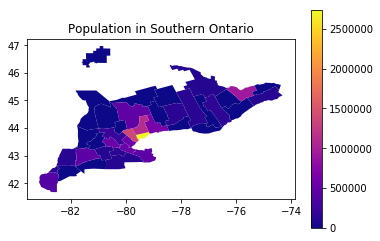

In [169]:
fig, ax = plt.subplots(1, 1)
south_p.plot(column='Population, 2016', ax=ax, legend=True, cmap='plasma')
plt.title('Population in Southern Ontario')

In [170]:
south_p['covid_rate']=south_p['ID']/south_p['Population, 2016']*10000

In [171]:
south_p = south_p.replace([np.inf, -np.inf], np.nan)

In [172]:
south_p['covid_rate'] = south_p['covid_rate'].fillna(0)


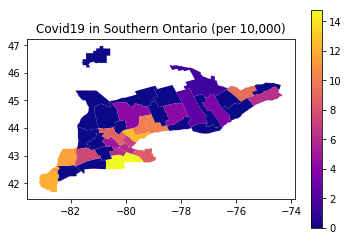

In [173]:
fig, ax = plt.subplots(1, 1)
south_p.plot(column='covid_rate', ax=ax, legend=True, cmap='plasma')
plt.title("Covid19 in Southern Ontario (per 10,000)")
plt.show()

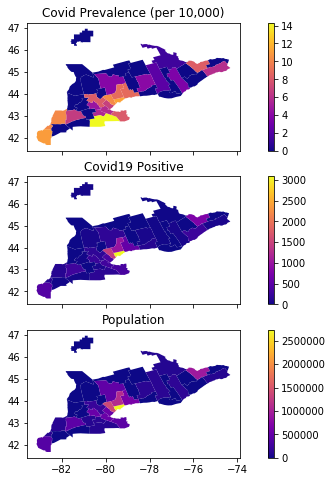

In [243]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex = True, figsize=(10,8))

#fig.suptitle('Southern Ontario 27/03/2020')

south_p.plot(column='Population, 2016', ax=ax3, legend=True, cmap='plasma' )
south_p.plot(column='ID', ax=ax2, legend=True, cmap='plasma')
south_p.plot(column='covid_rate', ax=ax1, legend=True, cmap='plasma')

ax3.set_title('Population')
ax2.set_title('Covid19 Positive')
ax1.set_title('Covid Prevalence (per 10,000)')

plt.show()

In [140]:
south_p

,CDUID,CDTYPE,PRUID,PRNAME,geometry,index_right,Reporting_PHU_City,Reporting_PHU_Latitude,Reporting_PHU_Longitude,ID,...,"Population, 2011",2011 adjusted population flag,"Population, % change","Total private dwellings, 2016","Private dwellings occupied by usual residents, 2016","Land area in square kilometres, 2016","Population density per square kilometre, 2016","National population rank, 2016","Provincial/territorial population rank, 2016",covid_rate
Brant,3529,CDR,35,Ontario,POLYGON ((-80.23103779868221 43.28740802305894...,2.0,Brantford,43.151811,-80.274374,72.0,...,136035.0,F,-0.9,54626.0,52722.0,1093.22,123.3,47.0,19.0,5.340929
Bruce,3541,CTY,35,Ontario,POLYGON ((-80.93518707999233 45.25006663769529...,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
Chatham-Kent,3536,CDR,35,Ontario,POLYGON ((-81.83510100476487 42.64907171203491...,4.0,Chatham,42.403861,-82.208561,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
Dufferin,3522,CTY,35,Ontario,"POLYGON ((-80.0141685789574 44.21327719499666,...",NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
Durham,3518,RM,35,Ontario,POLYGON ((-79.07503221185823 44.50005990827517...,32.0,Whitby,43.898605,-78.940341,506.0,...,608124.0,F,6.2,233936.0,227906.0,2523.80,255.9,10.0,5.0,7.834491
Elgin,3534,CTY,35,Ontario,POLYGON ((-80.88514191389459 42.86079588908424...,24.0,St. Thomas,42.777804,-81.151156,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
Essex,3537,CTY,35,Ontario,POLYGON ((-82.54448704604819 42.39250255840052...,33.0,Windsor,42.308796,-83.033670,415.0,...,388782.0,F,2.6,168569.0,159053.0,1850.90,215.5,21.0,12.0,10.402228
Frontenac,3510,CTY,35,Ontario,POLYGON ((-76.79163282633967 45.18223921626453...,9.0,Kingston,44.227874,-76.525211,54.0,...,149753.0,T,0.5,77155.0,64295.0,3787.76,39.7,40.0,15.0,3.588636
Greater Sudbury / Grand Sudbury,3553,CDR,35,Ontario,POLYGON ((-80.81792227032386 46.97275970169668...,26.0,Sudbury,46.466092,-80.998059,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
Grey,3542,CTY,35,Ontario,POLYGON ((-80.36621634262509 44.73620993602704...,17.0,Owen Sound,44.576196,-80.940980,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [85]:
#map also healthcare 

In [86]:
os.listdir('hosp')

['.ipynb_checkpoints',
 'conposcovidloc_march26.csv',
 'covidtesting_march26.csv',
 'ministry_of_finance_population_projections_for_ontario_census_divisions_2019-2046_0.xlsx',
 'Ministry_of_Health_Service_Provider_Locations',
 'Ministry_of_Health_Service_Provider_Locations.zip',
 'MOHSERLO.zip',
 'Neighbourhoods',
 'Neighbourhoods.zip',
 'ob_report_2020.xls',
 'ontario_hospitals.ipynb']

In [87]:
hospitals_shp = 'hosp/Ministry_of_Health_Service_Provider_Locations/Ministry_of_Health_Service_Provider_Locations.shp'

In [88]:
hospitals = gpd.read_file(hospitals_shp)

In [89]:
hospitals.columns

Index(['OGF_ID', 'MOH_SERVIC', 'SERVICE_TY', 'SERVICE__1', 'ENGLISH_NA',
       'FRENCH_NAM', 'ENGLISH__1', 'FRENCH_N_1', 'ADDRESS_LI', 'ADDRESS__1',
       'ADDRESS_DE', 'COMMUNITY', 'POSTAL_COD', 'GEOMETRY_U', 'EFFECTIVE_',
       'SYSTEM_DAT', 'OBJECTID', 'geometry'],
      dtype='object')

In [91]:
hospitals.crs

{'init': 'epsg:4326'}

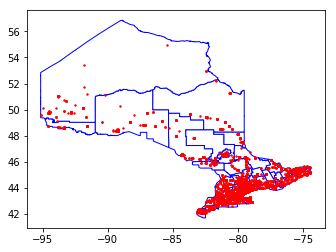

In [92]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ont_census.plot(ax =ax, color='white', edgecolor='blue')
hospitals.plot(ax=ax, marker='o', color='red', markersize=2)
plt.show()

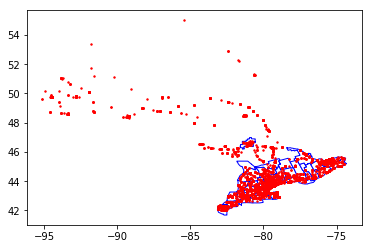

In [93]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
south_p.plot(ax =ax, color='white', edgecolor='blue')
hospitals.plot(ax=ax, marker='o', color='red', markersize=2)
plt.show()

In [104]:
south_p.index

Index(['Brant', 'Bruce', 'Chatham-Kent', 'Dufferin', 'Durham', 'Elgin',
       'Essex', 'Frontenac', 'Greater Sudbury / Grand Sudbury', 'Grey',
       'Haldimand-Norfolk', 'Haliburton', 'Halton', 'Hamilton', 'Hastings',
       'Huron', 'Kawartha Lakes', 'Lambton', 'Lanark', 'Leeds and Grenville',
       'Lennox and Addington', 'Middlesex', 'Muskoka', 'Niagara',
       'Northumberland', 'Ottawa', 'Oxford', 'Peel', 'Perth', 'Peterborough',
       'Prescott and Russell', 'Prince Edward', 'Renfrew', 'Simcoe',
       'Stormont, Dundas and Glengarry', 'Toronto', 'Waterloo', 'Wellington',
       'York'],
      dtype='object')

In [134]:
hn = south_p[south_p.index=='Haldimand-Norfolk']

In [106]:
lambton = south_p[south_p.index=='Lambton']

In [137]:
simcoe = south_p[south_p.index=='Simcoe']

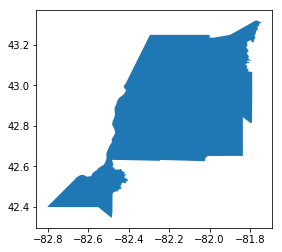

In [108]:
lambton.plot()

In [111]:
lambton.columns

Index(['CDUID', 'CDTYPE', 'PRUID', 'PRNAME', 'geometry', 'index_right',
       'Reporting_PHU_City', 'Reporting_PHU_Latitude',
       'Reporting_PHU_Longitude', 'ID', 'Geographic code', 'CD type',
       'Province or territory',
       'Incompletely enumerated Indian reserves and Indian settlements, 2016',
       'Population, 2016', 'Population, 2011', '2011 adjusted population flag',
       'Population, % change', 'Total private dwellings, 2016',
       'Private dwellings occupied by usual residents, 2016',
       'Land area in square kilometres, 2016',
       'Population density per square kilometre, 2016',
       'National population rank, 2016',
       'Provincial/territorial population rank, 2016', 'covid_rate'],
      dtype='object')

lambton_hospitals = gpd.sjoin( hospitals, lambton[['ID', 'geometry']], how="left", op='contains')

In [123]:
lambton_hospitals = hospitals[hospitals.intersects(lambton.unary_union)]

In [135]:
hn_hospitals = hospitals[hospitals.intersects(hn.unary_union)]

In [138]:
simcoe_hospitals = hospitals[hospitals.intersects(simcoe.unary_union)]

In [126]:
lambton_hospitals['SERVICE_TY'].unique()

array(['Long-Term Care Home', 'Midwifery Clinic', 'Retirement Home',
       'Pharmacy', 'Community Support Service',
       'Family Health Team - Contract', 'Laboratory - Hospital',
       'Mental Health and Addiction Organization',
       'Independent Health Facility', 'AIDS Bureau',
       'Senior Active Living Centre', 'Community Health Centre',
       'Laboratory - Specimen Collection Centre',
       'Nurse Practitioner Led Clinic', "Children's Treatment Centre",
       'Hospital - Site', 'Hospital - Corporation',
       'Public Health Unit Office'], dtype=object)

In [143]:
lambton_hospitals['MOH_SERVIC'].unique()

array(['2872', '10000000041', 'S0096', '2055', '176', '2217', '10835',
       '8255', '7391', '6429', '801', '689', '11880', 'S0219', '7611',
       '10000', '12118', '10000000012', '376', '12546', '4045', '11612',
       '515', '933', '724', '11628', '6684', '12514', '15495', '9715',
       '2573', '2667', 'S0127', '8305', 'M547', 'M613', '4460', '4197',
       '1115', '9512385', '10000000126', '2652', '4785', '4586', '8900',
       '9552', '2391566', '3272', '8961', '13681', '788', '11438',
       'S0003', '10000000025', '13676', 'S0126', '2889', '10000000237',
       '3471', '8597363', '4413', '5905974', 'S0017', '16289', '10789',
       '6905', '10000000128', '9318', '7992', 'S0147', '22827', '8352',
       '15437', '2474', '9207', '8027', '7889', '3821', '3877', '3349',
       '10000000011', '9869', '632', 'S0146', 'M559', '4364', '4221',
       '9611', 'S0351', '7364', '4357', '2544', '7459', '11767', '3292',
       '2802', '2659', '337', '10000000173', '2673', '10000000062', '98

In [128]:
lambton_hospitals['SERVICE_TY'].value_counts()

Pharmacy                                    52
Community Support Service                   13
Long-Term Care Home                         10
Retirement Home                              9
Mental Health and Addiction Organization     9
Independent Health Facility                  5
Senior Active Living Centre                  2
Family Health Team - Contract                2
Laboratory - Hospital                        2
AIDS Bureau                                  2
Laboratory - Specimen Collection Centre      2
Children's Treatment Centre                  1
Community Health Centre                      1
Hospital - Corporation                       1
Nurse Practitioner Led Clinic                1
Midwifery Clinic                             1
Public Health Unit Office                    1
Hospital - Site                              1
Name: SERVICE_TY, dtype: int64

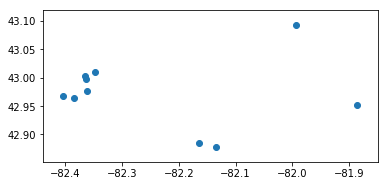

In [130]:
lambton_hospitals[lambton_hospitals['SERVICE_TY']=='Long-Term Care Home'].plot()

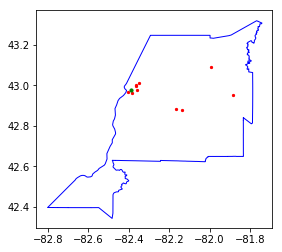

In [133]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
lambton.plot(ax =ax, color='white', edgecolor='blue')
lambton_hospitals[lambton_hospitals['SERVICE_TY']=='Long-Term Care Home'].plot(ax=ax, marker='o', color='red', markersize=5)
lambton_hospitals[lambton_hospitals['SERVICE_TY']=='Hospital - Corporation'].plot(ax=ax, marker='o', color='green', markersize=10)
plt.show()

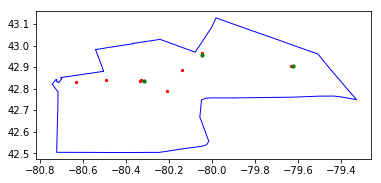

In [136]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
hn.plot(ax =ax, color='white', edgecolor='blue')
hn_hospitals[hn_hospitals['SERVICE_TY']=='Long-Term Care Home'].plot(ax=ax, marker='o', color='red', markersize=5)
hn_hospitals[hn_hospitals['SERVICE_TY']=='Hospital - Corporation'].plot(ax=ax, marker='o', color='green', markersize=10)
plt.show()

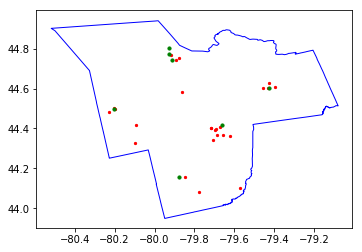

In [140]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
simcoe.plot(ax =ax, color='white', edgecolor='blue')
simcoe_hospitals[simcoe_hospitals['SERVICE_TY']=='Long-Term Care Home'].plot(ax=ax, marker='o', color='red', markersize=5)
simcoe_hospitals[simcoe_hospitals['SERVICE_TY']=='Hospital - Corporation'].plot(ax=ax, marker='o', color='green', markersize=10)
plt.show()

In [147]:
simcoe_hospitals[simcoe_hospitals['SERVICE_TY']=='Hospital - Corporation']

,OGF_ID,MOH_SERVIC,SERVICE_TY,SERVICE__1,ENGLISH_NA,FRENCH_NAM,ENGLISH__1,FRENCH_N_1,ADDRESS_LI,ADDRESS__1,ADDRESS_DE,COMMUNITY,POSTAL_COD,GEOMETRY_U,EFFECTIVE_,SYSTEM_DAT,OBJECTID,geometry
493,125308667,10000000197,Hospital - Corporation,Site,Orillia Soldiers' Memorial Hospital,None,Orillia Soldiers' Memorial Hospital,None,170 Colborne Street West,None,None,Orillia,L3V2Z3,2019-02-12T12:23:45.000Z,2019-02-11T10:36:34.000Z,2019-02-12T23:17:15.000Z,70337,POINT (-79.4248538834496 44.60463794792989)
2818,125301036,10000000027,Hospital - Corporation,Site,Georgian Bay General Hospital - Midland,None,Georgian Bay General Hospital,None,1112 St Andrew's Dr,None,None,Midland,L4R4P4,2019-02-12T13:33:06.000Z,2019-02-11T10:19:08.000Z,2019-02-12T23:17:15.000Z,214017,POINT (-79.91164495295051 44.74188624788349)
3699,125288914,10000000146,Hospital - Corporation,Site,Collingwood General and Marine Hospital,None,Collingwood General and Marine Hospital,None,459 Hume Street,None,None,Collingwood,L9Y1W8,2019-02-12T12:39:10.000Z,2019-02-11T09:55:10.000Z,2019-02-12T23:17:15.000Z,266769,POINT (-80.20274572302816 44.49810979229177)
3832,125281137,10000000115,Hospital - Corporation,Site,Waypoint Centre For Mental Health Care - main ...,None,Waypoint Centre for Mental Health Care,None,500 Church Street,None,None,Penetanguishene,L9M1G3,2019-02-12T12:37:24.000Z,2019-02-11T09:39:27.000Z,2019-02-12T23:17:15.000Z,275841,POINT (-79.92951116434955 44.8009368570161)
8917,125286208,10000000073,Hospital - Corporation,Site,Stevenson Memorial Hospital,None,Stevenson Memorial Hospital,None,200 Fletcher Crescent,None,None,Alliston,L9R1W7,2019-02-12T13:09:06.000Z,2019-02-11T09:49:41.000Z,2019-02-12T23:17:15.000Z,590145,POINT (-79.87600058646677 44.15528194928004)
9170,125279185,10000000167,Hospital - Corporation,Site,Beechwood Private Hospital,None,Beechwood Private Hospital,None,58 Church Street,None,None,Penetanguishene,L9M1B3,2019-02-12T12:57:31.000Z,2019-02-11T09:35:37.000Z,2019-02-12T23:17:15.000Z,606225,POINT (-79.9291281617223 44.77483255261602)
10610,125279479,10000000012,Hospital - Corporation,Site,Royal Victoria Regional Health Centre,None,Royal Victoria Regional Health Centre,None,201 Georgian Dr,None,None,Barrie,L4M6M2,2019-02-12T13:17:50.000Z,2019-02-11T09:36:11.000Z,2019-02-12T23:17:15.000Z,699761,POINT (-79.66204484211876 44.41619170437185)


In [76]:
#chart the growth per city!

In [176]:
data.columns

Index(['ROW_ID', 'ACCURATE_EPISODE_DATE', 'Age_Group', 'CLIENT_GENDER',
       'CASE_ACQUISITIONINFO', 'OUTCOME1', 'Reporting_PHU',
       'Reporting_PHU_Address', 'Reporting_PHU_City',
       'Reporting_PHU_Postal_Code', 'Reporting_PHU_Website',
       'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude'],
      dtype='object')

In [92]:
toronto_cases = data[data['Reporting_PHU_City']=='Toronto']

In [93]:
toronto_cases.head()

,ROW_ID,ACCURATE_EPISODE_DATE,Age_Group,CLIENT_GENDER,CASE_ACQUISITIONINFO,OUTCOME1,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude,ID
2,3,2020-03-05,30s,MALE,Travel-Related,Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358,2
3,4,2020-03-15,20s,FEMALE,Travel-Related,Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358,3
13,14,2020-03-24,50s,MALE,Information pending,Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358,13
16,17,2020-03-26,40s,MALE,Information pending,Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358,16
26,27,2020-03-25,50s,MALE,Neither,Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358,26


In [94]:
#aggregate per date

In [244]:
data['ID'] = np.arange(len(data))

In [245]:
data.columns

Index(['ROW_ID', 'ACCURATE_EPISODE_DATE', 'Age_Group', 'CLIENT_GENDER',
       'CASE_ACQUISITIONINFO', 'OUTCOME1', 'Reporting_PHU',
       'Reporting_PHU_Address', 'Reporting_PHU_City',
       'Reporting_PHU_Postal_Code', 'Reporting_PHU_Website',
       'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude', 'ID'],
      dtype='object')

In [246]:
data.head()

,ROW_ID,ACCURATE_EPISODE_DATE,Age_Group,CLIENT_GENDER,CASE_ACQUISITIONINFO,OUTCOME1,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude,ID
0,1,2020-01-22,50s,FEMALE,Travel-Related,Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358,0
1,2,2020-01-21,50s,MALE,Travel-Related,Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358,1
2,3,2020-01-24,20s,FEMALE,Travel-Related,Resolved,Middlesex-London Health Unit,50 King Street,London,N6A 5L7,www.healthunit.com,42.981468,-81.254016,2
3,4,2020-02-05,20s,FEMALE,Travel-Related,Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358,3
4,5,2020-02-16,60s,FEMALE,Travel-Related,Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358,4


In [ ]:
#emergeing patterns? look aggregate per city and date and plot trends?

In [85]:
all_dates = pd.pivot_table(data, values='ID', index='ACCURATE_EPISODE_DATE',
                    columns=['Reporting_PHU_City'], aggfunc='count')

In [86]:
all_dates = pd.DataFrame(all_dates.to_records())

In [87]:
all_dates.index

RangeIndex(start=0, stop=73, step=1)

In [88]:
all_dates.index = pd.to_datetime(all_dates['ACCURATE_EPISODE_DATE'])

In [89]:
all_dates.columns

Index(['ACCURATE_EPISODE_DATE', 'Barrie', 'Belleville', 'Brantford',
       'Brockville', 'Chatham', 'Cornwall', 'Guelph', 'Hamilton', 'Kenora',
       'Kingston', 'London', 'Mississauga', 'New Liskeard', 'Newmarket',
       'North Bay', 'Oakville', 'Ottawa', 'Owen Sound', 'Pembroke',
       'Peterborough', 'Point Edward', 'Port Hope', 'Sault Ste. Marie',
       'Simcoe', 'St. Thomas', 'Stratford', 'Sudbury', 'Thorold',
       'Thunder Bay', 'Timmins', 'Toronto', 'Waterloo', 'Whitby', 'Windsor'],
      dtype='object')

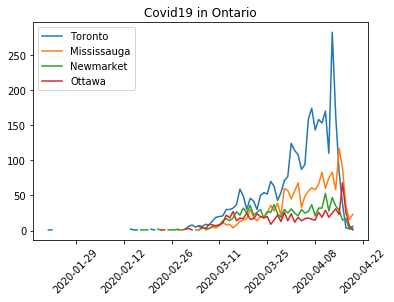

In [90]:
plt.plot(all_dates['Toronto'])
plt.plot(all_dates['Mississauga'])
plt.plot(all_dates['Newmarket'])
plt.plot(all_dates['Ottawa'])
plt.title('Covid19 in Ontario')
plt.legend(('Toronto','Mississauga', 'Newmarket', 'Ottawa' ))
plt.xticks(rotation=45)
plt.show()

In [91]:
#need a seven day rolling avarge df.rolling(2).sum()

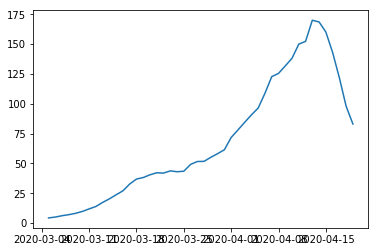

In [92]:
plt.plot(all_dates['Toronto'].rolling(7).mean())

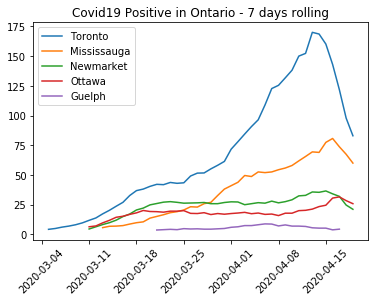

In [93]:
plt.plot(all_dates['Toronto'].rolling(7).mean())
plt.plot(all_dates['Mississauga'].rolling(7).mean())
plt.plot(all_dates['Newmarket'].rolling(7).mean())
plt.plot(all_dates['Ottawa'].rolling(7).mean())
plt.plot(all_dates['Guelph'].rolling(7).mean())
plt.title('Covid19 Positive in Ontario - 7 days rolling')
plt.legend(('Toronto','Mississauga', 'Newmarket', 'Ottawa', 'Guelph' ))
plt.xticks(rotation=45)
plt.show()

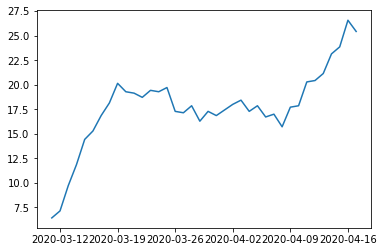

In [257]:
plt.plot(all_dates['Ottawa'].rolling(7).mean())

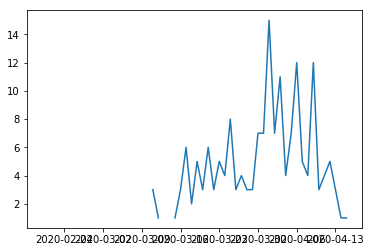

In [151]:
plt.plot(all_dates['Guelph'])

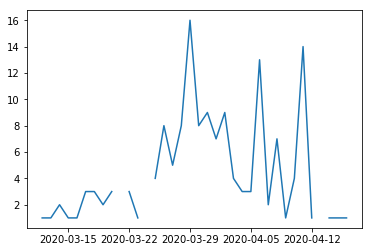

In [152]:
plt.plot(all_dates['Simcoe'])

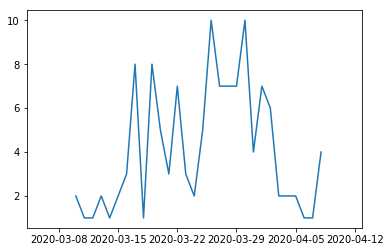

In [153]:
plt.plot(all_dates['Point Edward'])

In [156]:
all_dates.columns

Index(['ACCURATE_EPISODE_DATE', 'Barrie', 'Belleville', 'Brantford',
       'Brockville', 'Chatham', 'Cornwall', 'Guelph', 'Hamilton', 'Kenora',
       'Kingston', 'London', 'Mississauga', 'New Liskeard', 'Newmarket',
       'North Bay', 'Oakville', 'Ottawa', 'Owen Sound', 'Pembroke',
       'Peterborough', 'Point Edward', 'Port Hope', 'Sault Ste. Marie',
       'Simcoe', 'St. Thomas', 'Stratford', 'Sudbury', 'Thorold',
       'Thunder Bay', 'Timmins', 'Toronto', 'Waterloo', 'Whitby', 'Windsor'],
      dtype='object')

In [ ]:
plt.plot(all_dates['Point Edward'])

In [99]:
cases.columns

Index(['Reported Date', 'Confirmed Negative', 'Presumptive Negative',
       'Under Investigation', 'Presumptive Positive', 'Confirmed Positive',
       'Resolved', 'Deaths',
       'Total patients approved for testing as of Reporting Date',
       'Total Cases', 'Number of patients hospitalized with COVID-19',
       'Number of patients in ICU with COVID-19',
       'Number of patients in ICU on a ventilator with COVID-19'],
      dtype='object')

In [100]:
cases.index = pd.to_datetime(cases['Reported Date'])

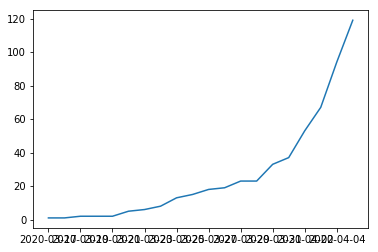

In [101]:
plt.plot(cases['Deaths'])

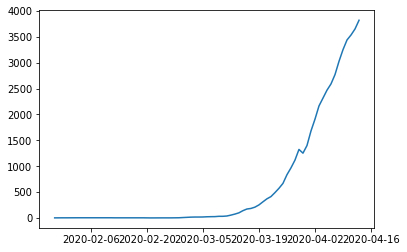

In [198]:
plt.plot(cases['Confirmed Positive'])

In [199]:
cases['mortality_rate'] = cases['Deaths']/cases['Confirmed Positive']

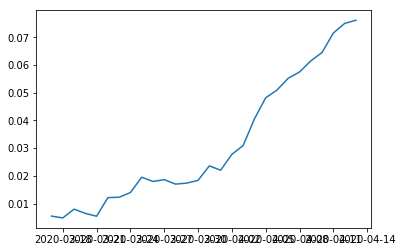

In [200]:
plt.plot(cases['mortality_rate'])

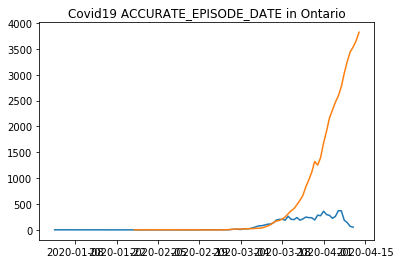

In [201]:
fig, ax = plt.subplots(1, 1)
plt.plot(all_dates) #when did it start
plt.plot(cases['Confirmed Positive']) #comulative!
plt.title('Covid19 ACCURATE_EPISODE_DATE in Ontario')
plt.show()

In [202]:
all_dates['ID'].sum()

7049

In [203]:
cumulative = []
c=0
for i in (all_dates['ID']):
    c=i+c
    cumulative.append(c)

In [204]:
all_dates['cum'] = cumulative

In [205]:
cases.columns

Index(['Reported Date', 'Confirmed Negative', 'Presumptive Negative',
       'Under Investigation', 'Presumptive Positive', 'Confirmed Positive',
       'Resolved', 'Deaths',
       'Total patients approved for testing as of Reporting Date',
       'Total Cases', 'Number of patients hospitalized with COVID-19',
       'Number of patients in ICU with COVID-19',
       'Number of patients in ICU on a ventilator with COVID-19',
       'mortality_rate'],
      dtype='object')

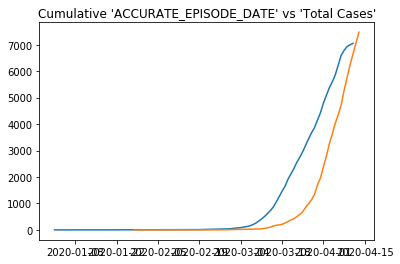

In [206]:
fig, ax = plt.subplots(1, 1)
plt.plot(all_dates['cum']) #calculated cumulatives from Accurate episode date
plt.plot(cases['Total Cases']) #comulatives from cases dataset
plt.title("Cumulative 'ACCURATE_EPISODE_DATE' vs 'Total Cases'")
plt.show()

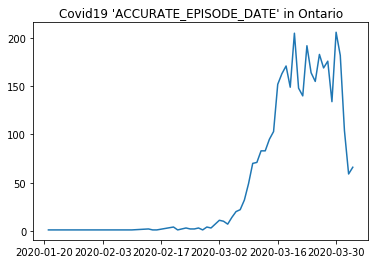

In [111]:
fig, ax = plt.subplots(1, 1)
plt.plot(all_dates['ID']) #when did it start
#plt.plot(cases['Confirmed Positive']) #comulative!
plt.title("Covid19 'ACCURATE_EPISODE_DATE' in Ontario")
plt.show()

In [112]:
cases.index

DatetimeIndex(['2020-01-26', '2020-01-27', '2020-01-28', '2020-01-30',
               '2020-01-31', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-08', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-17',
               '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
               '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
               '2020-02-28', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
      

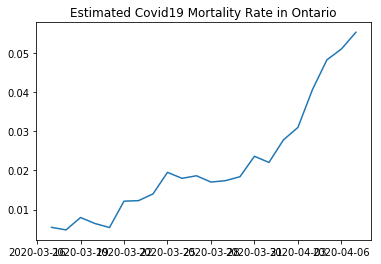

In [257]:
plt.plot(cases['mortality_rate'])
plt.title("Estimated Covid19 Mortality Rate in Ontario")
plt.show()

In [114]:
locations.head(10)

,Reporting_PHU_City,Reporting_PHU_Latitude,Reporting_PHU_Longitude,ID,geometry
30,Toronto,43.656591,-79.379358,845,POINT (-79.37935801 43.65659125)
11,Mississauga,43.647471,-79.708893,443,POINT (-79.7088933 43.6474713)
13,Newmarket,44.048023,-79.480239,401,POINT (-79.480239 44.048023)
16,Ottawa,45.345665,-75.763912,309,POINT (-75.76391219999999 45.3456651)
32,Whitby,43.898605,-78.940341,194,POINT (-78.940341 43.898605)
31,Waterloo,43.462876,-80.520913,140,POINT (-80.52091315 43.46287573)
7,Hamilton,43.257631,-79.871341,137,POINT (-79.87134089 43.2576311)
33,Windsor,42.308796,-83.033670,120,POINT (-83.0336705 42.3087965)
15,Oakville,43.413997,-79.744796,114,POINT (-79.74479581 43.41399692)
27,Thorold,43.116537,-79.241220,110,POINT (-79.2412197 43.1165366)


In [258]:
south_p[south_p['covid_rate']>=5]

,CDUID,CDTYPE,PRUID,PRNAME,geometry,index_right,Reporting_PHU_City,Reporting_PHU_Latitude,Reporting_PHU_Longitude,ID,...,"Population, 2011",2011 adjusted population flag,"Population, % change","Total private dwellings, 2016","Private dwellings occupied by usual residents, 2016","Land area in square kilometres, 2016","Population density per square kilometre, 2016","National population rank, 2016","Provincial/territorial population rank, 2016",covid_rate
Haldimand-Norfolk,3528,CDR,35,Ontario,POLYGON ((-79.80358419482742 43.06784989061945...,23.0,Simcoe,42.847825,-80.303815,79.0,...,109118.0,F,0.6,48249.0,43559.0,2894.76,37.9,58.0,24.0,7.195752
Lambton,3538,CTY,35,Ontario,"POLYGON ((-81.76871330615032 43.2661872537339,...",20.0,Point Edward,42.986416,-82.404808,83.0,...,126199.0,F,0.3,59777.0,54481.0,3002.25,42.2,50.0,20.0,6.554115


In [ ]:
#kingston and sarnia have high covid rate - could be related to border crossing from the USA? why sarnia and niagra not the same?

In [118]:
data.columns

Index(['ROW_ID', 'ACCURATE_EPISODE_DATE', 'Age_Group', 'CLIENT_GENDER',
       'CASE_ACQUISITIONINFO', 'OUTCOME1', 'Reporting_PHU',
       'Reporting_PHU_Address', 'Reporting_PHU_City',
       'Reporting_PHU_Postal_Code', 'Reporting_PHU_Website',
       'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude', 'ID'],
      dtype='object')

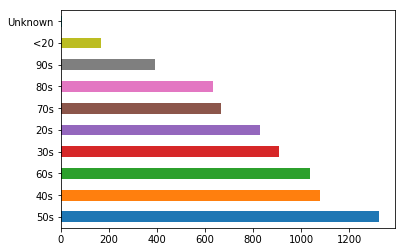

In [207]:
data['Age_Group'].value_counts().plot(kind = 'barh')

In [ ]:
#calculate the pupolation age gropus

In [90]:
pop = pd.read_excel ('hosp/ministry_of_finance_population_projections_for_ontario_census_divisions_2019-2046_0.xlsx', skiprows=4)

In [91]:
pop2019 = pop[pop['YEAR (JULY 1)']==2019]

In [92]:
pop2019.columns

Index(['YEAR (JULY 1)',   'REGION CODE',   'REGION NAME',           'SEX',
               'TOTAL',               0,               1,               2,
                     3,               4,               5,               6,
                     7,               8,               9,              10,
                    11,              12,              13,              14,
                    15,              16,              17,              18,
                    19,              20,              21,              22,
                    23,              24,              25,              26,
                    27,              28,              29,              30,
                    31,              32,              33,              34,
                    35,              36,              37,              38,
                    39,              40,              41,              42,
                    43,              44,              45,              46,
                    47,  

In [95]:
pop2019['SEX'].unique()

array(['MALE', 'FEMALE', 'TOTAL'], dtype=object)

In [96]:
total2019 = pop2019[pop2019['SEX']=='TOTAL']

In [102]:
ages = total2019.iloc[:,5:].sum()

In [106]:
ages = pd.DataFrame(ages)

bins= [-1,0,2,4,13,20, 110]
labels = ['unknown','Infant','Toddler','Kid','Teen', 'Adult']
X_train_data['AgeGroup'] = pd.cut(X_train_data['Age'], bins=bins, labels=labels, right=False)

In [151]:
bins= [-1,20,30,40,50,60,70,80,89, 100]
labels = ['<20', '20s', '30s','40s', '50s', '60s', '70s', '80s', '90s']

In [134]:
ages['age'] = np.arange(len(ages))

In [136]:
ages.columns

Index(['count', 'age', 'age_group'], dtype='object')

In [137]:
ages.head()

,count,age,age_group
0,145909.0,0,under20
1,147299.0,1,under20
2,145845.0,2,under20
3,145811.0,3,under20
4,147407.0,4,under20


In [152]:
ages['age_group'] = pd.cut(ages.age, bins=bins, labels=labels)

In [154]:
ontario_ages = pd.pivot_table(ages,values = 'count', index='age_group', aggfunc='sum')

In [144]:
ontario_ages

,count
age_group,
under20,3356996.0
20s,2075730.0
30s,1948800.0
40s,1865974.0
50s,2069621.0
60s,1662860.0
70s,1020558.0
80s,442231.0
90s,131042.0


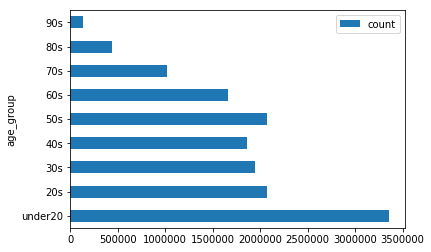

In [145]:
ontario_ages.plot(kind = 'barh')

In [164]:
ontario_ages.index

CategoricalIndex(['<20', '20s', '30s', '40s', '50s', '60s', '70s', '80s',
                  '90s'],
                 categories=['<20', '20s', '30s', '40s', '50s', '60s', '70s', '80s', ...], ordered=True, name='age_group', dtype='category')

In [185]:
ontario_ages.to_records(index=False)

rec.array([(3356996.,), (2075730.,), (1948800.,), (1865974.,),
           (2069621.,), (1662860.,), (1020558.,), ( 442231.,),
           ( 131042.,)],
          dtype=[('count', '<f8')])

In [202]:
ontages = pd.DataFrame(ontario_ages.to_records(index=False) )

In [203]:
ontages

,count
0,3356996.0
1,2075730.0
2,1948800.0
3,1865974.0
4,2069621.0
5,1662860.0
6,1020558.0
7,442231.0
8,131042.0


In [197]:
ontario_ages.index[0:-1]

CategoricalIndex(['<20', '20s', '30s', '40s', '50s', '60s', '70s', '80s'], categories=['<20', '20s', '30s', '40s', '50s', '60s', '70s', '80s', ...], ordered=True, name='age_group', dtype='category')

In [204]:
ontages['age groups']=labels

In [205]:
ontages

,count,age groups
0,3356996.0,<20
1,2075730.0,20s
2,1948800.0,30s
3,1865974.0,40s
4,2069621.0,50s
5,1662860.0,60s
6,1020558.0,70s
7,442231.0,80s
8,131042.0,90s


In [148]:
data['Age_Group'].value_counts()

50s        298
60s        273
40s        255
30s        235
20s        220
70s        161
80s         80
<20         43
90s         34
Unknown      3
Name: Age_Group, dtype: int64

Try to join these sets

In [147]:
south_p[south_p['covid_rate']>=0.5]

,CDUID,CDTYPE,PRUID,PRNAME,geometry,index_right,Health Unit City,Health Unit Latitude,Health Unit Longitude,Case number,...,"Population, 2011",2011 adjusted population flag,"Population, % change","Total private dwellings, 2016","Private dwellings occupied by usual residents, 2016","Land area in square kilometres, 2016","Population density per square kilometre, 2016","National population rank, 2016","Provincial/territorial population rank, 2016",covid_rate
Frontenac,3510,CTY,35,Ontario,POLYGON ((-76.79163282633967 45.18223921626453...,8.0,Kingston,44.227874,-76.525211,12.0,...,149753.0,T,0.5,77155.0,64295.0,3787.76,39.7,40.0,15.0,0.797475
Hamilton,3525,CDR,35,Ontario,POLYGON ((-79.86045371315016 43.34735059806324...,6.0,Hamilton,43.257631,-79.871341,32.0,...,519949.0,F,3.3,222918.0,211596.0,1117.29,480.6,13.0,7.0,0.595995
Peterborough,3515,CTY,35,Ontario,POLYGON ((-77.95536261130685 44.90134610040595...,17.0,Peterborough,44.301632,-78.321347,7.0,...,134928.0,T,2.5,70551.0,57743.0,3848.20,35.9,45.0,17.0,0.506380
Toronto,3520,CDR,35,Ontario,"POLYGON ((-79.1520235957221 43.81438746604473,...",26.0,Toronto,43.656591,-79.379358,168.0,...,2615060.0,F,4.5,1179057.0,1112929.0,630.20,4334.4,1.0,1.0,0.615031
York,3519,RM,35,Ontario,POLYGON ((-79.25061303595132 44.45319031536156...,12.0,Newmarket,44.048023,-79.480239,75.0,...,1032524.0,F,7.5,369928.0,357084.0,1762.13,629.9,7.0,3.0,0.675731


In [105]:
import plotly.express as px

In [52]:
import string

In [53]:
locations['city']=locations['Health Unit City'].str.upper()

In [54]:
locations['city']

0               BARRIE
1           BELLEVILLE
2            BRANTFORD
3              CHATHAM
4             CORNWALL
5               GUELPH
6             HAMILTON
7               KENORA
8             KINGSTON
9               LONDON
10         MISSISSAUGA
11        NEW LISKEARD
12           NEWMARKET
13           NORTH BAY
14            OAKVILLE
15              OTTAWA
16          OWEN SOUND
17        PETERBOROUGH
18        POINT EDWARD
19           PORT HOPE
20    SAULT STE. MARIE
21          ST. THOMAS
22           STRATFORD
23             SUDBURY
24             THOROLD
25             TIMMINS
26             TORONTO
27            WATERLOO
28              WHITBY
29             WINDSOR
Name: city, dtype: object

In [55]:
pop2019['REGION NAME']=pop2019['REGION NAME'].str.strip()

C:\Users\tzvik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
print(pop2019['REGION NAME'])

1                            TORONTO
2                             DURHAM
3                             HALTON
4                               PEEL
5                               YORK
6                              BRANT
7                           DUFFERIN
8                  HALDIMAND-NORFOLK
9                         HALIBURTON
10                          HAMILTON
11                           MUSKOKA
12                           NIAGARA
13                    NORTHUMBERLAND
14                      PETERBOROUGH
15                            SIMCOE
16                    KAWARTHA LAKES
17                          WATERLOO
18                        WELLINGTON
19                            OTTAWA
20                         FRONTENAC
21                          HASTINGS
22                            LANARK
23                 LEEDS & GRENVILLE
24              LENNOX AND ADDINGTON
25                PRESCOTT & RUSSELL
26                     PRINCE EDWARD
27                           RENFREW
2

In [56]:
np.intersect1d(pop2019['REGION NAME'], locations['city'])

array(['HAMILTON', 'KENORA', 'OTTAWA', 'PETERBOROUGH', 'SUDBURY',
       'TORONTO', 'WATERLOO'], dtype=object)

In [ ]:
#need to clean discerpency in naming of places in the sets

In [58]:
hamilton = pop2019.loc[(pop2019['REGION NAME']=='HAMILTON') & (pop2019['SEX'] == 'TOTAL'),'TOTAL']

In [59]:
hamilton = hamilton.tolist()

In [60]:
hamilton #total population in hamilton

[575259.0]

In [61]:
for c in locations['city']:
    try: 
        t= pop2019.loc[(pop2019['REGION NAME']==c) & (pop2019['SEX'] == 'TOTAL'),'TOTAL']
        t = t.tolist()
        print(t[0]," are in ", c)
        
    except: 
        continue

575259.0  are in  HAMILTON
70871.0  are in  KENORA
1029540.0  are in  OTTAWA
150541.0  are in  PETERBOROUGH
22548.0  are in  SUDBURY
3035567.0  are in  TORONTO
592008.0  are in  WATERLOO


In [62]:
for c,p in zip(locations['city'], locations['Case number']):
    try:
        t= pop2019.loc[(pop2019['REGION NAME']==c) & (pop2019['SEX'] == 'TOTAL'),'TOTAL']
        t = t.tolist()
        print(t[0]," are in ", c,"and", p, "are positive")
    except:
        continue


575259.0  are in  HAMILTON and 32 are positive
70871.0  are in  KENORA and 2 are positive
1029540.0  are in  OTTAWA and 32 are positive
150541.0  are in  PETERBOROUGH and 7 are positive
22548.0  are in  SUDBURY and 5 are positive
3035567.0  are in  TORONTO and 168 are positive
592008.0  are in  WATERLOO and 21 are positive


In [97]:
pop2019['REGION NAME'].unique()

array(['TORONTO', 'DURHAM', 'HALTON', 'PEEL', 'YORK', 'BRANT', 'DUFFERIN',
       'HALDIMAND-NORFOLK', 'HALIBURTON', 'HAMILTON', 'MUSKOKA',
       'NIAGARA', 'NORTHUMBERLAND', 'PETERBOROUGH', 'SIMCOE',
       'KAWARTHA LAKES', 'WATERLOO', 'WELLINGTON', 'OTTAWA', 'FRONTENAC',
       'HASTINGS', 'LANARK', 'LEEDS & GRENVILLE', 'LENNOX AND ADDINGTON',
       'PRESCOTT & RUSSELL', 'PRINCE EDWARD', 'RENFREW',
       'STORMONT, DUNDAS & GLENGARRY', 'BRUCE', 'ELGIN', 'ESSEX', 'GREY',
       'HURON', 'CHATHAM-KENT', 'LAMBTON', 'MIDDLESEX', 'OXFORD', 'PERTH',
       'ALGOMA', 'COCHRANE', 'MANITOULIN', 'NIPISSING', 'PARRY SOUND',
       'GREATER SUDBURY', 'SUDBURY', 'TIMISKAMING', 'KENORA',
       'RAINY RIVER', 'THUNDER BAY'], dtype=object)

In [96]:
locations['city']

0               BARRIE
1           BELLEVILLE
2            BRANTFORD
3              CHATHAM
4             CORNWALL
5               GUELPH
6             HAMILTON
7               KENORA
8             KINGSTON
9               LONDON
10         MISSISSAUGA
11        NEW LISKEARD
12           NEWMARKET
13            OAKVILLE
14              OTTAWA
15          OWEN SOUND
16        PETERBOROUGH
17           PORT HOPE
18    SAULT STE. MARIE
19           STRATFORD
20             SUDBURY
21             THOROLD
22             TIMMINS
23             TORONTO
24            WATERLOO
25              WHITBY
26             WINDSOR
Name: city, dtype: object

In [ ]:
#now lets add the total population from the projection table

In [ ]:
#use plotly for interactive plots?